# FB Metrics prediction using Ensemble Learning
In this problem, we have the Facebook data on which we have to build a classification model using Ensemble learning. 

In [81]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [82]:
fb_metrics = pd.read_csv('CW2_Facebook_metrics.csv')
fb_metrics.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,Comments,Likes,Shares,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [3]:
fb_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [4]:
fb_metrics.isna().sum()

Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [83]:
fb_metrics = fb_metrics.dropna()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18]),
 [Text(1, 0, 'Page total likes'),
  Text(2, 0, 'Category'),
  Text(3, 0, 'Post Month'),
  Text(4, 0, 'Post Weekday'),
  Text(5, 0, 'Post Hour'),
  Text(6, 0, 'Paid'),
  Text(7, 0, 'Lifetime Post Total Reach'),
  Text(8, 0, 'Lifetime Post Total Impressions'),
  Text(9, 0, 'Lifetime Engaged Users'),
  Text(10, 0, 'Lifetime Post Consumers'),
  Text(11, 0, 'Lifetime Post Consumptions'),
  Text(12, 0, 'Lifetime Post Impressions by people who have liked your Page'),
  Text(13, 0, 'Lifetime Post reach by people who like your Page'),
  Text(14, 0, 'Lifetime People who have liked your Page and engaged with your post'),
  Text(15, 0, 'Comments'),
  Text(16, 0, 'Likes'),
  Text(17, 0, 'Shares'),
  Text(18, 0, 'Total Interactions')])

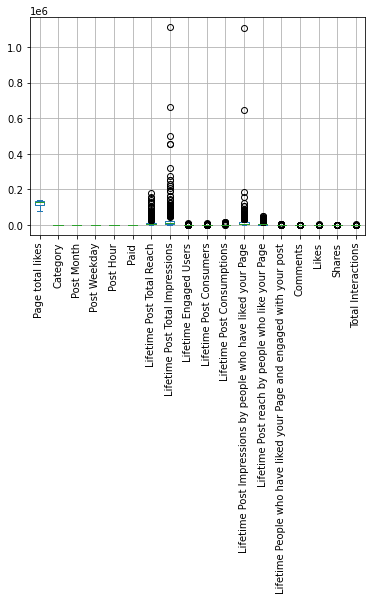

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fb_metrics.plot.box(grid='True')
plt.xticks(rotation='vertical')

## EDA

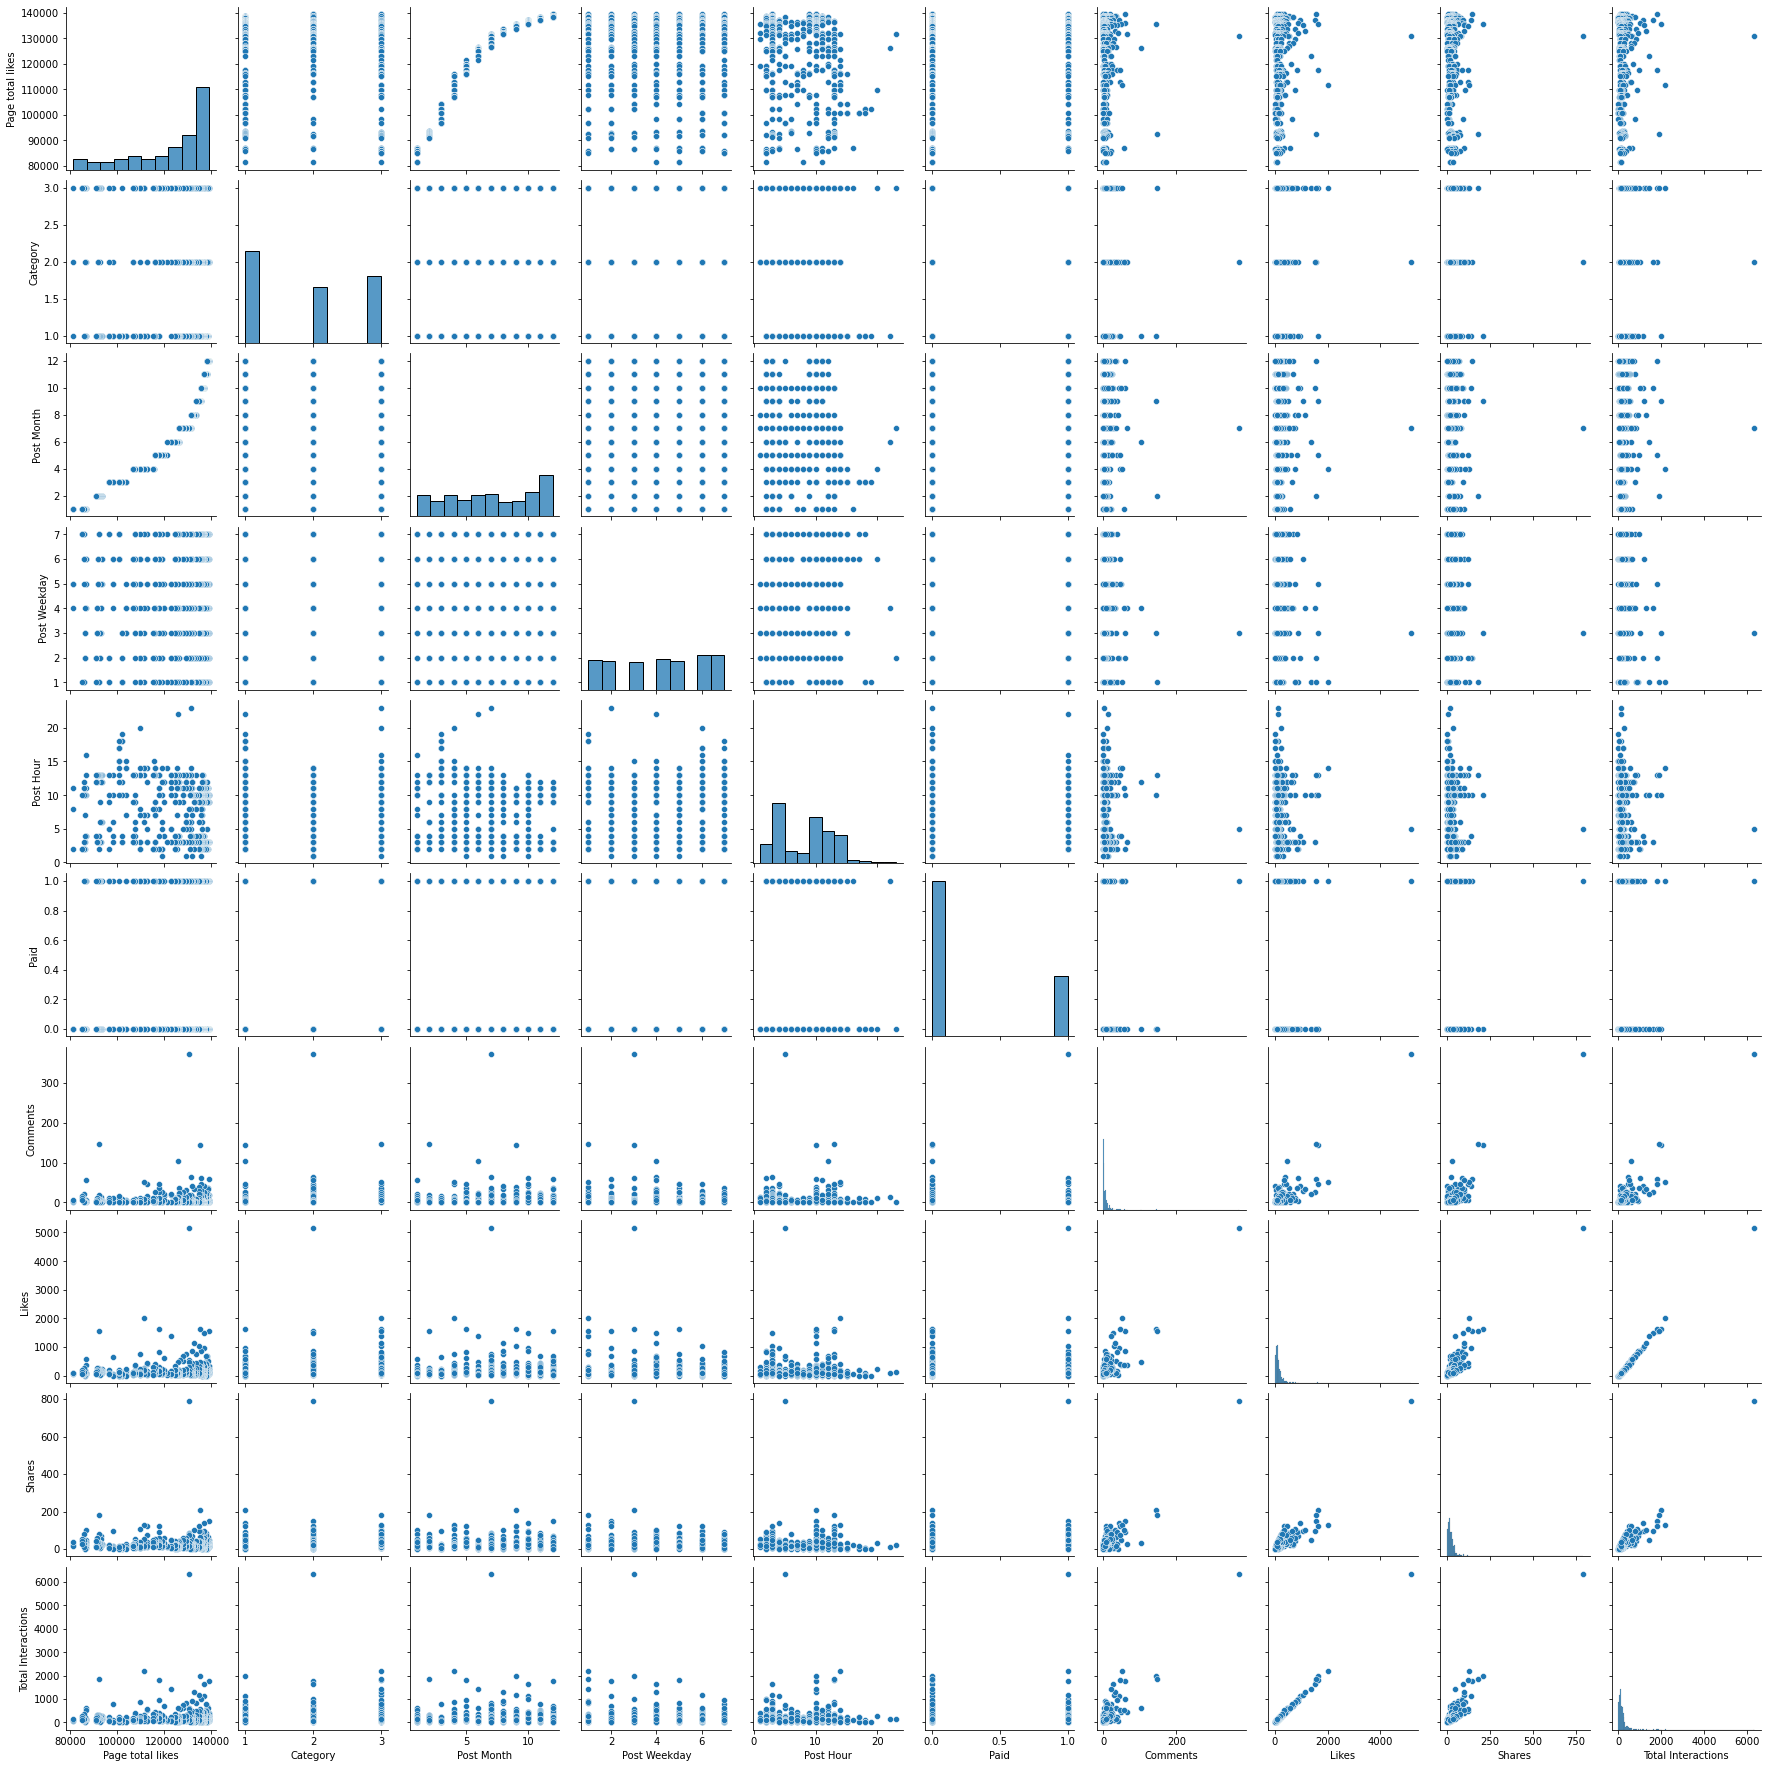

In [7]:
fb_metrics['Type'] = fb_metrics['Type'].apply(lambda x: str(x))
plotdf = fb_metrics.drop(fb_metrics.columns[7:15],axis =1)
sns.pairplot(data=plotdf)

<AxesSubplot:>

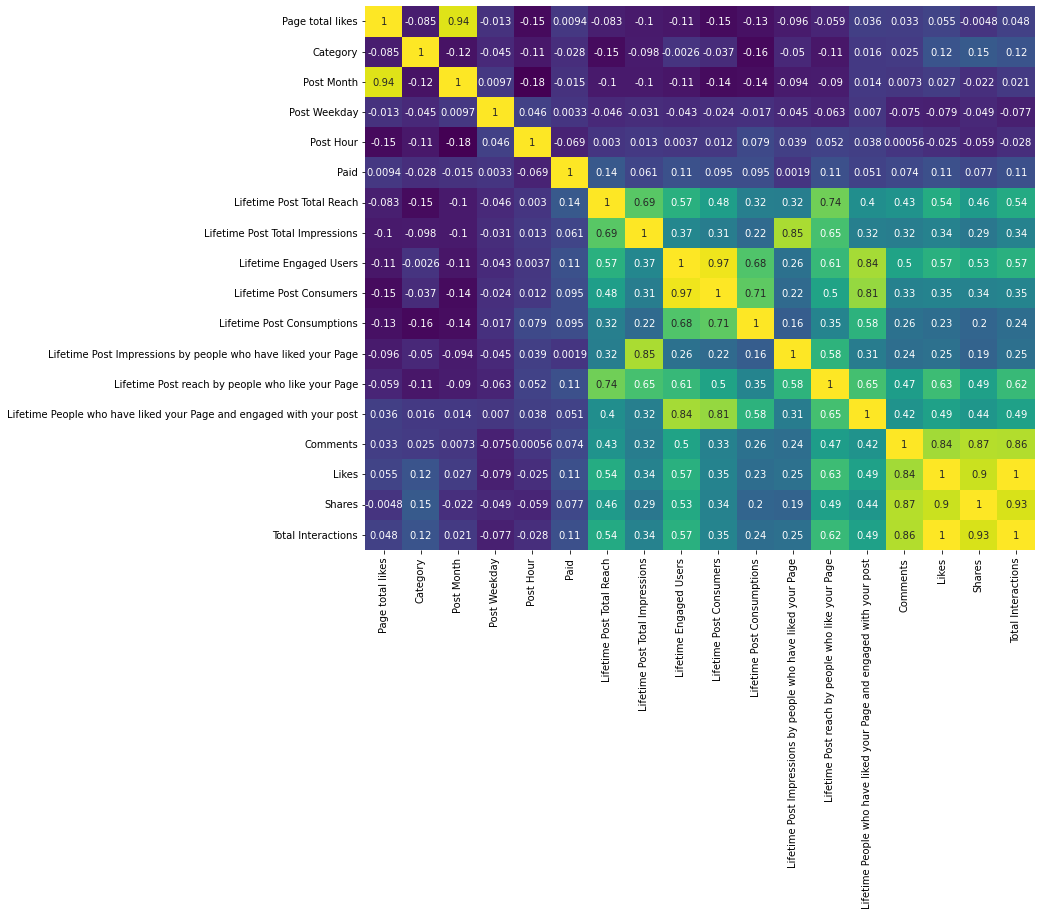

In [8]:
plt.figure(figsize=(12,10))
sns.heatmap(fb_metrics.corr(),cmap='viridis',annot=True,cbar=False)

The lifetime metrics all appear to have high correlation wiith the engagement metrics- likes, comments, shares, total interactions (a sum of the 3 prior features). This suggests a regression model predicting total engaged users might have suitable performance.

### EDA of Lifetime Metrics

(0.0, 4000.0)

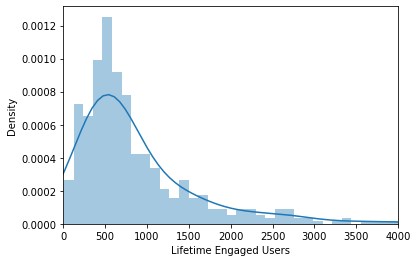

In [9]:
sns.distplot(fb_metrics['Lifetime Engaged Users'],bins=100)
plt.xlim(0,4000)

The majority of posts engaged between 0 and 2000 users, with a dramatic left skew. The max was 12000 users engaged. 

<AxesSubplot:xlabel='Lifetime Post Total Reach', ylabel='Density'>

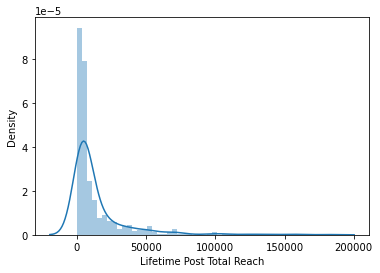

In [10]:
sns.distplot(fb_metrics['Lifetime Post Total Reach'])
#plt.xlim(0,15000)

The majority of posts reached between 0 and 8000 users, and similar to the engaged users, a dramatic left skew.

<AxesSubplot:xlabel='Lifetime Post Total Impressions', ylabel='Density'>

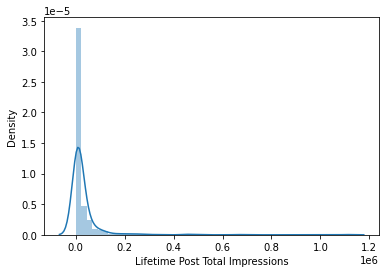

In [11]:
sns.distplot(fb_metrics['Lifetime Post Total Impressions'],bins=50)
#plt.xlim(0,15000)

Text(0.5, 0.98, 'Engagement Metrics vs. Lifetime Engaged Users')

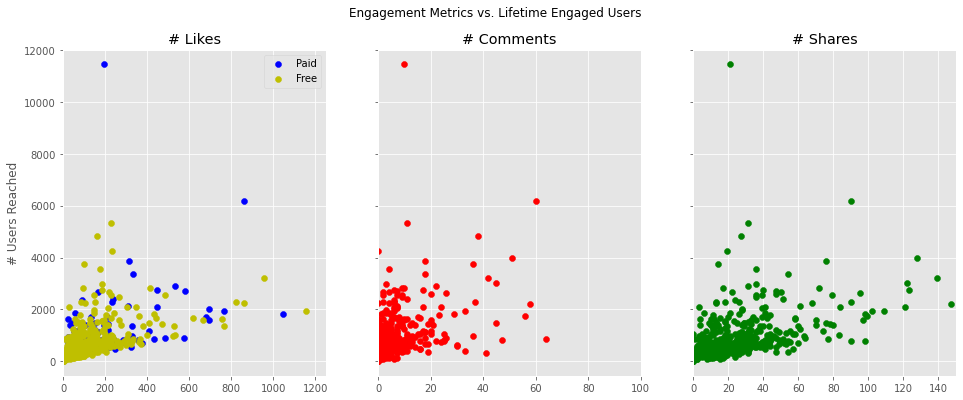

In [12]:
plt.style.use('ggplot')

fig, ax = plt.subplots(ncols=3,nrows=1,sharey=True,figsize=(16,6))
paid =fb_metrics[fb_metrics['Paid']==1]
free = fb_metrics[fb_metrics['Paid']==0]


ax[0].scatter(paid['Likes'],paid['Lifetime Engaged Users'],color='b')
ax[0].scatter(free['Likes'],free['Lifetime Engaged Users'],color='y')
ax[0].set_title('# Likes')
ax[0].set_xlim(0,1250)
ax[0].legend(labels=['Paid','Free'])

ax[1].scatter(fb_metrics['Comments'],fb_metrics['Lifetime Engaged Users'],color='r')
ax[1].set_title('# Comments')
ax[1].set_xlim(0,100)

ax[2].scatter(fb_metrics['Shares'],fb_metrics['Lifetime Engaged Users'],color='g')
ax[2].set_title('# Shares')
ax[2].set_xlim(0,150)

ax[0].set_ylabel("# Users Reached")

fig.suptitle('Engagement Metrics vs. Lifetime Engaged Users',fontsize=12)

#fig.tight_layout()
#fig.canvas.set_window_title('Engagement Metrics vs. Lifetime Reach') 
#set_title('')

We see positive relationships most explicitly between Lifetime Engaged Users and likes/shares, and less so for comments.

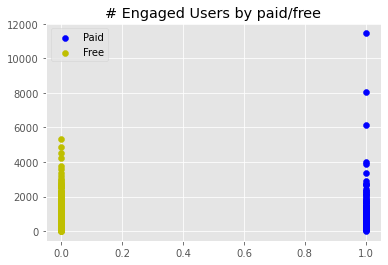

In [13]:
fig, ax = plt.subplots()
ax.scatter(paid['Paid'],paid['Lifetime Engaged Users'],color='b')
ax.scatter(free['Paid'],free['Lifetime Engaged Users'],color='y')
ax.set_title('# Engaged Users by paid/free')
ax.legend(labels=['Paid','Free'])

Not much difference between paid/free post performance on Lifetime Engaged Users.

In [14]:
fb_metrics.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'Comments', 'Likes', 'Shares', 'Total Interactions'],
      dtype='object')

(0.0, 3000.0)

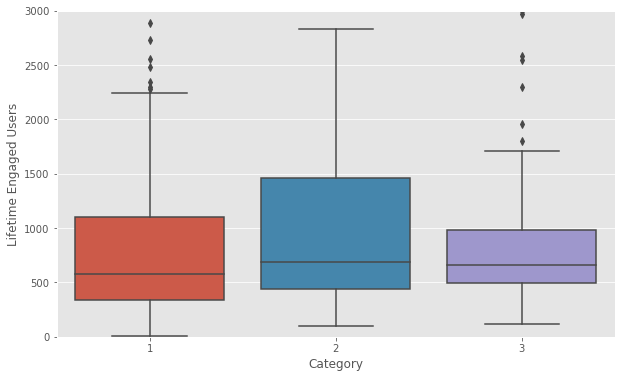

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=fb_metrics['Category'],y=fb_metrics['Lifetime Engaged Users'])
plt.ylim(0,3000)

Category 2 posts on average had engaged a higher number of users.

<AxesSubplot:xlabel='Type', ylabel='Lifetime Engaged Users'>

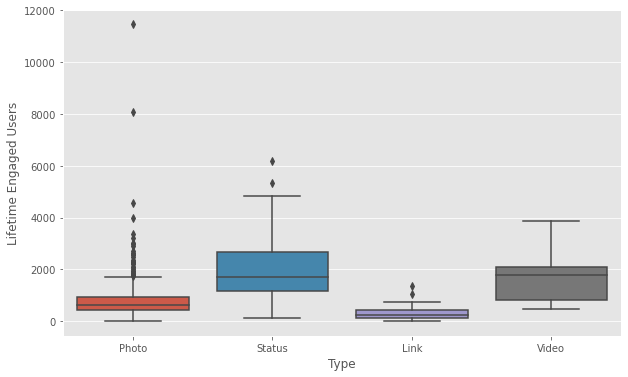

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(x=fb_metrics['Type'],y=fb_metrics['Lifetime Engaged Users'])
#plt.ylim(0,3000)

Status and Video posts, followed by photo posts, engaged the most users.

Text(0.5, 1.0, 'Post Interactions vs. Lifetime Engaged Users')

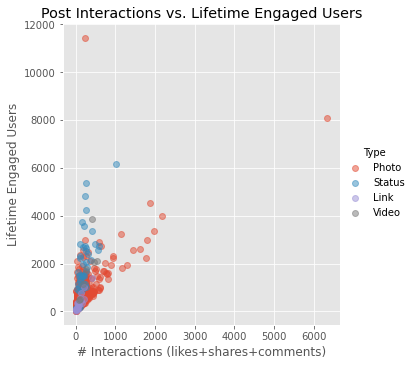

In [17]:
plt.style.use('ggplot')
sns.lmplot(x='Total Interactions',y='Lifetime Engaged Users',
           hue='Type',data=fb_metrics,fit_reg=False,scatter_kws= {'alpha':0.5})
plt.xlabel("# Interactions (likes+shares+comments)")
plt.title('Post Interactions vs. Lifetime Engaged Users')

Text(0.5, 1.0, 'Post Interactions vs. Lifetime Engaged Users')

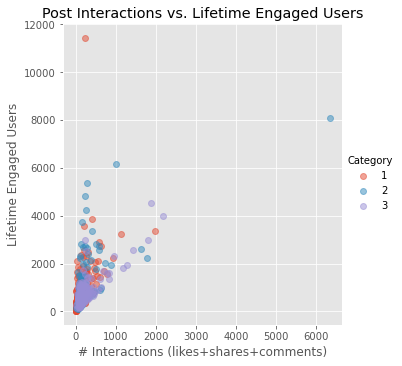

In [18]:
plt.style.use('ggplot')
sns.lmplot(x='Total Interactions',y='Lifetime Engaged Users',
           hue='Category',data=fb_metrics,fit_reg=False,scatter_kws= {'alpha':0.5})
plt.xlabel("# Interactions (likes+shares+comments)")
plt.title('Post Interactions vs. Lifetime Engaged Users')

Text(0.5, 1.0, 'Post Interactions vs. Lifetime Engaged Users')

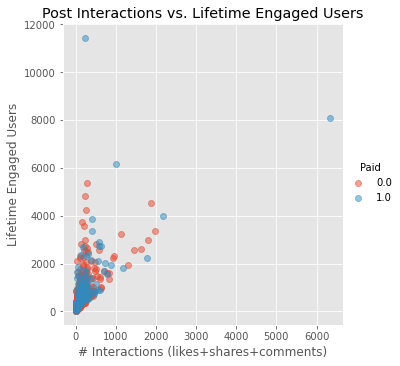

In [19]:
plt.style.use('ggplot')
sns.lmplot(x='Total Interactions',y='Lifetime Engaged Users',
           hue='Paid',data=fb_metrics,fit_reg=False,scatter_kws= {'alpha':0.5})
plt.xlabel("# Interactions (likes+shares+comments)")
plt.title('Post Interactions vs. Lifetime Engaged Users')

Text(0.5, 1.0, 'Page Likes vs. Lifetime Engaged Users')

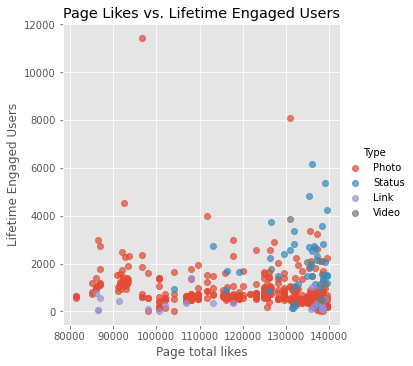

In [20]:
plt.style.use('ggplot')
sns.lmplot(x='Page total likes',y='Lifetime Engaged Users',
           hue='Type',data=fb_metrics,fit_reg=False,scatter_kws= {'alpha':0.7})
#plt.xlabel("# Interactions (likes+shares+comments)")
plt.title('Page Likes vs. Lifetime Engaged Users')

Text(0.5, 1.0, 'Page Likes vs. Lifetime Engaged Users')

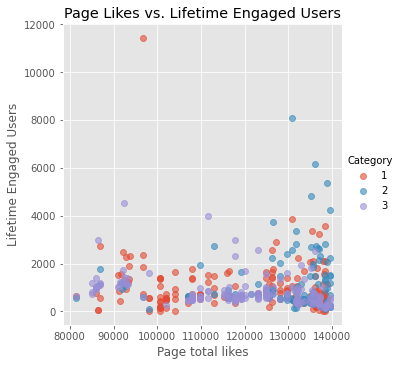

In [21]:
plt.style.use('ggplot')
sns.lmplot(x='Page total likes',y='Lifetime Engaged Users',
           hue='Category',data=fb_metrics,fit_reg=False,scatter_kws= {'alpha':0.6})
#plt.xlabel("# Interactions (likes+shares+comments)")
plt.title('Page Likes vs. Lifetime Engaged Users')

(0.0, 3000.0)

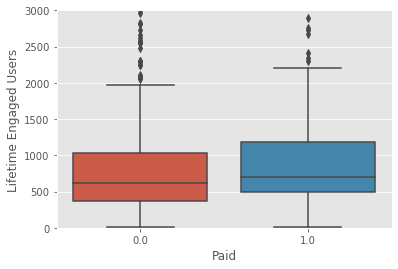

In [22]:
plt.style.use('ggplot')
sns.boxplot(x=fb_metrics['Paid'],y=fb_metrics['Lifetime Engaged Users'])
plt.ylim(0,3000)

No real difference in lifetime engaged users from paid posts or not, though Paid posts do have a slightly higher median.

Text(0.5, 1.0, 'Post Engagement by Weekday')

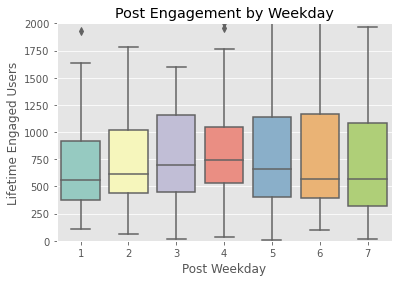

In [23]:
plt.style.use('ggplot')
sns.boxplot(x=fb_metrics['Post Weekday'],y=fb_metrics['Lifetime Engaged Users'],palette='Set3')
plt.ylim(0,2000)
plt.title("Post Engagement by Weekday")
#plt.xticks(labs=['Su','M','Tu','W','Th','F','Sa'])

# Model Building
For model building we have to split our data into train and test data.

In [90]:
y = fb_metrics['Type']
y = y.map({'Photo':1, 'Status':2, 'Link':3, 'Video':4},y)
x = fb_metrics.drop('Type',axis = 1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=0)

## Ensemble Voting
For Ensemble voting we take four different Classification models and first train the model individually on them. After this training we use the voting method to the final prediction. We have used both hard and soft voting here. The majority vote is done in hard voting.

In [91]:
########################### Voting ############################################

# Import the required libraries
from sklearn import datasets, linear_model, svm, neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier()
learner_2 = linear_model.LogisticRegression()
learner_3 = RandomForestClassifier()
learner_4 = svm.SVC()

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('LR', learner_2),
                           ('RF', learner_3),
                           ('SVM', learner_4)])

# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)
learner_4.fit(x_train, y_train)

# Get the base learner predictions
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)
predictions_4 = learner_4.predict(x_test)
# Predict the most voted class
hard_predictions = voting.predict(x_test)

# Accuracies of base learners
print('L1:', accuracy_score(y_test, predictions_1)) # 86 %
print('L2:', accuracy_score(y_test, predictions_2)) # 88 %
print('L3:', accuracy_score(y_test, predictions_3)) # 93 %
print('L4:', accuracy_score(y_test, predictions_4)) # 83 %

# Accuracy of hard voting
print('Hard Voting:', accuracy_score(y_test, hard_predictions))

L1: 0.8686868686868687
L2: 0.8888888888888888
L3: 0.9494949494949495
L4: 0.8383838383838383
Hard Voting: 0.8686868686868687


In [92]:
# Soft Voting # 
# Instantiate the learners (classifiers)
learner_1 = neighbors.KNeighborsClassifier()
learner_2 = linear_model.LogisticRegression()
learner_3 = RandomForestClassifier()
learner_4 = svm.SVC(probability = True)

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('LR', learner_2),
                           ('RF', learner_3),
                           ('SVM', learner_4)],
                            voting = 'soft')

# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)
learner_4.fit(x_train, y_train)

# Predict the most probable class
hard_predictions = voting.predict(x_test)

# Get the base learner predictions
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)
predictions_4 = learner_4.predict(x_test)

# Accuracies of base learners
print('L1:', accuracy_score(y_test, predictions_1)) # 86 %
print('L2:', accuracy_score(y_test, predictions_2)) # 88 %
print('L3:', accuracy_score(y_test, predictions_3)) # 92 %
print('L4:', accuracy_score(y_test, predictions_4)) # 83 %

# Accuracy of Soft voting
print('Soft Voting:', accuracy_score(y_test, hard_predictions))

L1: 0.8686868686868687
L2: 0.8888888888888888
L3: 0.9292929292929293
L4: 0.8383838383838383
Soft Voting: 0.9292929292929293


## Tuning using GridSearchCV
After making prediction on the base models, we try to search for the best parameters for each model using GridSearchCV to tune it to get better results

In [93]:
from sklearn.model_selection import GridSearchCV
def GridSerach(model,param_grid):
    grid = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
    grid_search=grid.fit(x_train, y_train)
    
    return(grid_search.best_params_)

In [94]:
# KNN
knn = neighbors.KNeighborsClassifier()
knn_param = {
    'n_neighbors':list(range(1, 21)),
    'metric':['euclidean','manhattan','minkowski'],
    'weights':['uniform', 'distance']
}
knn_best_param = GridSerach(knn,knn_param)
print(knn_best_param)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [95]:
# LR
lr = linear_model.LogisticRegression()
lr_param = {
    "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    "C":  [100, 10, 1.0, 0.1, 0.01],
    "penalty":['none', 'l1', 'l2', 'elasticnet']
}
lr_best_param = GridSerach(lr,lr_param)
print(lr_best_param)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


In [96]:
# RF
rf = RandomForestClassifier()
rf_param = {
    "max_features":['sqrt', 'log2'],
    "n_estimators": [5, 10, 50, 100, 300],
    "min_samples_split": [3, 5, 10, 20],
    "max_depth": [3, 5, 10, 20]
}
rf_best_param = GridSerach(rf,rf_param)
print(rf_best_param)

Fitting 10 folds for each of 160 candidates, totalling 1600 fits
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_split': 3, 'n_estimators': 10}


In [97]:
# SVM
svM = svm.SVC(probability=True)
svM_param = {
    'gamma':['scale'],
    'C':[1.0, 0.1, 0.001],
    'kernel' : ['linear','poly','rbf','sigmoid']
}
svM_best_param = GridSerach(svM,svM_param)
print(svM_best_param)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
{'C': 1.0, 'gamma': 'scale', 'kernel': 'linear'}


Using these finely tuned parameters, we again train the models.

In [98]:
learner_1 = neighbors.KNeighborsClassifier(**knn_best_param)
learner_2 = linear_model.LogisticRegression(**lr_best_param)
learner_3 = RandomForestClassifier(**rf_best_param)
learner_4 = svm.SVC(**svM_best_param,probability = True)

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('LR', learner_2),
                           ('RF', learner_3),
                           ('SVM', learner_4)],
                            voting = 'soft')

# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)
learner_4.fit(x_train, y_train)

# Predict the most probable class
hard_predictions = voting.predict(x_test)

# Get the base learner predictions
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)
predictions_4 = learner_4.predict(x_test)

# Accuracies of base learners
print('L1:', accuracy_score(y_test, predictions_1)) # 86 %
print('L2:', accuracy_score(y_test, predictions_2)) # 88 %
print('L3:', accuracy_score(y_test, predictions_3)) # 94 %
print('L4:', accuracy_score(y_test, predictions_4)) # 83 %

# Accuracy of Soft voting
print('Soft Voting:', accuracy_score(y_test, hard_predictions))

L1: 0.8888888888888888
L2: 0.9090909090909091
L3: 0.9191919191919192
L4: 0.8888888888888888
Soft Voting: 0.9191919191919192


In [99]:
# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('LR', learner_2),
                           ('RF', learner_3),
                           ('SVM', learner_4)])

# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)
learner_4.fit(x_train, y_train)

# Predict the most probable class
hard_predictions = voting.predict(x_test)

# Get the base learner predictions
predictions_1 = learner_1.predict(x_test)
predictions_2 = learner_2.predict(x_test)
predictions_3 = learner_3.predict(x_test)
predictions_4 = learner_4.predict(x_test)

# Accuracies of base learners
print('L1:', accuracy_score(y_test, predictions_1)) # 86 %
print('L2:', accuracy_score(y_test, predictions_2)) # 88 %
print('L3:', accuracy_score(y_test, predictions_3)) # 94 %
print('L4:', accuracy_score(y_test, predictions_4)) # 83 %

# Accuracy of Soft voting
print('Hard Voting:', accuracy_score(y_test, hard_predictions))

L1: 0.8888888888888888
L2: 0.9090909090909091
L3: 0.9292929292929293
L4: 0.8888888888888888
Hard Voting: 0.9191919191919192


## Evalution Metrics
### Accuracy

In [105]:
accuracy_score(y_test, hard_predictions)

0.9191919191919192

### Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, hard_predictions)

array([[83,  0,  0,  0],
       [ 2,  8,  0,  0],
       [ 5,  0,  0,  0],
       [ 1,  0,  0,  0]], dtype=int64)

### Precision

In [101]:
from sklearn.metrics import precision_score
precision_score(y_test, hard_predictions,average='weighted')

0.8656898656898656

### Recall

In [102]:
from sklearn.metrics import recall_score
recall_score(y_test, hard_predictions, average='weighted')

0.9191919191919192

### F1 Score

In [103]:
from sklearn.metrics import f1_score
f1_score(y_test, hard_predictions, average='weighted')

0.889624211463292

### ROC-AUC

In [109]:
learner_1 = neighbors.KNeighborsClassifier(**knn_best_param)
learner_2 = linear_model.LogisticRegression(**lr_best_param)
learner_3 = RandomForestClassifier(**rf_best_param)
learner_4 = svm.SVC(**svM_best_param,probability = True)

# Instantiate the voting classifier
voting = VotingClassifier([('KNN', learner_1),
                           ('LR', learner_2),
                           ('RF', learner_3),
                           ('SVM', learner_4)],
                            voting = 'soft')

# Fit classifier with the training data
voting.fit(x_train, y_train)
learner_1.fit(x_train, y_train)
learner_2.fit(x_train, y_train)
learner_3.fit(x_train, y_train)
learner_4.fit(x_train, y_train)

# Predict the most probable class
hard_probs = voting.predict_proba(x_test)
from sklearn.metrics import roc_curve, roc_auc_score

roc_auc_score(y_test, hard_probs, multi_class='ovo', average='weighted')

0.9845969737536002

### ROC Curve

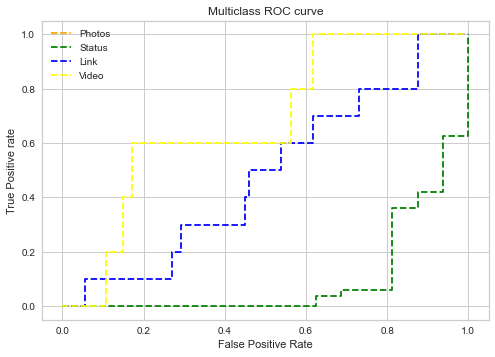

In [115]:
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, hard_probs[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Photos')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Status')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Link')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Video')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);  